Alumno: Paez Sheridan, Pablo Santiago
Mail: pablopaezsheridan@outlook.com.ar
Ingeniero en Sistemas de Informacion

<h1>Movies</h1> 
Paez Sheridan, Pablo Santiago
Fecha: 15/07/1997
<h2>Introducción</h2>

 En este proyecto se desarrolla en Python un análisis básico de datos sobre películas de cine
 de IMDB. El set de datos que vamos a usar inicialmente se encuentra en la siguiente
 página:
 https://www.kaggle.com/datasets/carolzhangdc/imdb-5000-movie-dataset

 En ella puede encontrarse información más detallada, así como una descripción precisa de
 cada columna.

<span style="color: blue;">
    A lo largo de este documento veremos diferentes ejemplos practicos de manipulacion y obtencion de informacion a partir de un gran dataset utilizando python y librerias de terceros para python muy utiles para este proposito.

    El objetivo fue poner en practica y asentar conocimientos adquiridos en el cursado del modulo de Python del master de Ciencia de datos impartido por la Universidad Complutense de Madrid.
</span>

 Se plantean los apartados iniciales para su resolución sin usar la libreria pandas. Esto se
 propone así para forzar a practicar con las técnicas, herramientas y conceptos básicos de
 Python. Más adelante, hay otros apartados propuestos para su resolución con esta librería y
 otras.

<span style="color: blue;">
    <p>Sinceramente me ha servido mucho para asentar cosas que creia que sabia pero no la sabia en realidad. Soy un programdor backend exprimentado pero en otras tecnologias (C# y .Net) y no en python y mucho menos en lo referido a ciencia de datos, por lo que si bien algunos puntos me resultaron sencillos otros fueron todo un desafio y me hicieron exprimentar de la ira a la alegria mas de una vez.
    </p>
    <p>Espero que en estas lineas se puede ver reflejado ese esfuerzo y dedicacion. Use diferentes fuentes para ayudarme como chat-gpt o gemini sin embargo el uso de las mismas fue prudente y de consulta (como uno lo usa laboralmente), todo lo que presento en este trabajo es de mi autoria y puedo explicar su funcionamiento sin ningun problema.</p>
    <p>Desde ya pido disculpas por la falta de comentarios explicativos y documentacion de las funciones. Se que eso junto con algunas desprolijidades asi como resolucion no del todo satisfactoria de mis ejercios puede bajarme la nota. Dicho esto ya que se nos solicito que pongamos la nota que sugerimos adecuada creo que este trabajo esta para un 8</p>
</span>


In [25]:
# Constantes globales:

MOVIES_DATA = './movie_metadata.csv'

In [26]:
# Librerías:

import csv
import pandas as pd
from collections import defaultdict
import matplotlib.pyplot as plt
from  bs4 import  BeautifulSoup
import requests
import os
import datetime

<h2>Parte A. Ejercicios básicos sin usar pandas </h2>

<h3> A.1. Exploración inicial básica del archivo de datos</h3>

In [27]:
def load_full_data(data_file_path:int)-> tuple[list[str],list[list[str]]]:
    with open(data_file_path, mode='r') as file:
        reader = csv.reader(file)
        headers = next(reader)
        data = [row for row in reader]
    return headers, data

In [28]:
# Test de funcionamiento
full_header, full_list_data = load_full_data(MOVIES_DATA)
print(full_header)
print()
print(full_list_data[0:5])

['color', 'director_name', 'num_critic_for_reviews', 'duration', 'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name', 'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name', 'movie_title', 'num_voted_users', 'cast_total_facebook_likes', 'actor_3_name', 'facenumber_in_poster', 'plot_keywords', 'movie_imdb_link', 'num_user_for_reviews', 'language', 'country', 'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes', 'imdb_score', 'aspect_ratio', 'movie_facebook_likes']

[['Color', 'James Cameron', '723', '178', '0', '855', 'Joel David Moore', '1000', '760505847', 'Action|Adventure|Fantasy|Sci-Fi', 'CCH Pounder', 'Avatar\xa0', '886204', '4834', 'Wes Studi', '0', 'avatar|future|marine|native|paraplegic', 'http://www.imdb.com/title/tt0499549/?ref_=fn_tt_tt_1', '3054', 'English', 'USA', 'PG-13', '237000000', '2009', '936', '7.9', '1.78', '33000'], ['Color', 'Gore Verbinski', '302', '169', '563', '1000', 'Orlando Bloom', '40000', '309404152', 'Action|Adventure|F

Mostrar las posiciones de los identificadores de los campos, dados en la línea cabecera

In [29]:
list_of_enumerated_headers = [(i,header)for i,header in enumerate(full_header)]

In [30]:
# Test de funcionamiento
print(list_of_enumerated_headers)

[(0, 'color'), (1, 'director_name'), (2, 'num_critic_for_reviews'), (3, 'duration'), (4, 'director_facebook_likes'), (5, 'actor_3_facebook_likes'), (6, 'actor_2_name'), (7, 'actor_1_facebook_likes'), (8, 'gross'), (9, 'genres'), (10, 'actor_1_name'), (11, 'movie_title'), (12, 'num_voted_users'), (13, 'cast_total_facebook_likes'), (14, 'actor_3_name'), (15, 'facenumber_in_poster'), (16, 'plot_keywords'), (17, 'movie_imdb_link'), (18, 'num_user_for_reviews'), (19, 'language'), (20, 'country'), (21, 'content_rating'), (22, 'budget'), (23, 'title_year'), (24, 'actor_2_facebook_likes'), (25, 'imdb_score'), (26, 'aspect_ratio'), (27, 'movie_facebook_likes')]


<h3>A.2. Campos principales de una película</h3>

Los campos (columnas) del archivo son demasiados. No nos interesan todos ellos. Dada
una lista con todos los campos, se pide extraer otra lista sólo con los campos con los que
vamos a trabajar en los siguientes apartados: movie_title , title_year ,
director_name , actor_1_name , language , country , color , budget ,
imdb_score y movie_imdb_link 

In [31]:
def main_data_from_item(data:list[str]) -> list[str]:
    selected_columns = ["movie_title", "title_year", "director_name", "actor_1_name", "language", "country", "budget", "imdb_score", "movie_imdb_link"]
    selected_columns_indexes = [full_header.index(d) for c in selected_columns for d in full_header if c in d]
    return [data[si] for si in selected_columns_indexes]    

In [32]:
# Test de funcionamiento
print(main_data_from_item(full_header))
print()
datos_avatar_2009 = main_data_from_item(full_list_data[0])
print(datos_avatar_2009)
print()
datos_star_wars_7 = main_data_from_item(full_list_data[4])
print(datos_star_wars_7)

['movie_title', 'title_year', 'director_name', 'actor_1_name', 'language', 'country', 'budget', 'imdb_score', 'movie_imdb_link']

['Avatar\xa0', '2009', 'James Cameron', 'CCH Pounder', 'English', 'USA', '237000000', '7.9', 'http://www.imdb.com/title/tt0499549/?ref_=fn_tt_tt_1']

['Star Wars: Episode VII - The Force Awakens\xa0            ', '', 'Doug Walker', 'Doug Walker', '', '', '', '7.1', 'http://www.imdb.com/title/tt5289954/?ref_=fn_tt_tt_1']


<h3>A.3. Algunos ajustes en los campos</h3>

Observa la anomalía en el string del título de la película. También, queremos tratar algunos
campos como numéricos, ya sea enteros (el año y el presupuesto) o reales (la valoración).
(Algunos campos numéricos enteros están vacíos en el archivo de datos; para ellos, el valor
imputado será -1 .) Además, en las urls de las películas no necesitaremos el fragmento
final, iniciado con ?ref_ 

In [ ]:
def datatypes_arranged(data : list[str])->list[str]:
    """Clean the data recieved as input. 
    Numeric missing data replaced by -1 and cast to correct type. 
    Urls cleaned of its query part
    Args:
        data (list[str]): data to be clenaned

    Returns:
        list[str]: data cleaned
    """
    data_treated = []
    numeric_indexes = [1,6,7]
    for index,d in enumerate(data):
        try:
            if d == "" and index in numeric_indexes:
                data_treated.append(-1)
            elif (index in numeric_indexes):
                data_treated.append(int(d))
            elif (index == 8):
                data_treated.append(d.split('?ref_')[0])
            else:
                data_treated.append(d)
        except:
            data_treated.append(d)
    return data_treated

In [34]:
# Test de funcionamiento
print(datatypes_arranged(datos_avatar_2009))
print(datatypes_arranged(datos_star_wars_7))

['Avatar\xa0', 2009, 'James Cameron', 'CCH Pounder', 'English', 'USA', 237000000, '7.9', 'http://www.imdb.com/title/tt0499549/']
['Star Wars: Episode VII - The Force Awakens\xa0            ', -1, 'Doug Walker', 'Doug Walker', '', '', -1, '7.1', 'http://www.imdb.com/title/tt5289954/']


<h3> A.4. Recuperación de alguna información básica</h3>

<p> Diseña funciones para recuperar la siguiente información: </p>
<ul>
    <li> El conjunto de valores posibles del campo `Color`.</li>
    <li> Los títulos de película de nuestro archivo (limpios de caracteres extraños), junto con la cantidad de calificadores (un entero), que contengan la subcadena "Victor".</li>        
<ul>

In [ ]:
def column_values(column_index: int)-> set:
    """Retrieve all the possible values from a column in the movies_metadata dataset
    Args:
        column_index (int): index wich identify the column to search
    Returns:
        set: all possible values from the column
    """
    values = set()
    column_data = [row[column_index] for row in full_list_data[1:]] 
    for d in column_data:
        values.add(d)
    return values

def film_ocurrences(search_parameter:str) -> tuple[str,int]:
    """Search for the films that contains a string in their movie_title field.
    Args:
        search_parameter (str): string to find
    Returns:
        tuple[str,int]: films that have that string in their movie_title field
    """
    films = [()]
    for row in full_list_data[1:]:
        ocurrences = 0
        if(search_parameter in row[11]):
            ocurrences = sum([1 for f in full_list_data[1:] if row[11] in f[11]])
            films.append((row[11], ocurrences))
    return films

colores = column_values(0)
pelis_victor = film_ocurrences("Victor")

In [36]:
# Test de funcionamiento
print(colores)
print(pelis_victor)

{'', ' Black and White', 'Color'}
[(), ('Victor Frankenstein\xa0', 3), ('Victor Frankenstein\xa0', 3), ('The Young Victoria\xa0', 1), ('Victor Frankenstein\xa0', 3), ('Raising Victor Vargas\xa0', 1)]


<h2> B Datos en un diccionario [2 puntos]</h2>
<h3>B.1. Carga únicamente de datos que vamos a usar</h3>
<p> En lugar de cargar todos los datos del archivo, luego generar otro archivo con los datos que
 nos interesan y luego ajustarlos, es mejor diseñar una función que recorre el archivo de
 datos y, de cada línea del archivo, únicamente retiene la parte que nos interesa, cargando la
 cabecera por un lado y, por otro, la lista de datos de interés, ajustados como ya hemos
 dicho.
 Cargaremos esta información en un diccionario, cuyas claves serán pares (título, año)
 y cuyos valores se recogen en una lista con el resto de los campos.
 Además, los datos de cada película tras la clave (título, año) están repetidas en el
 archivo de datos con todos los datos idénticos; y lo que es peor: alguna que está repetida</p>

In [ ]:
def load_main_data(data_file_path:str) -> dict[tuple[str,int], list]:
    """Load data from dataset in a dictionary
    Args:
        data_file_path (str): dataset relative file path
    Returns:
        tuple[tuple[str,int], list]: for each film the key is the movie_title and the title_year, the values are all the other from the film
    """
    data_frame = pd.read_csv(data_file_path)
    data_frame = data_frame.fillna(-1)
    dict_from_df = {
    (row['movie_title'], row['title_year']): row.drop(['movie_title', 'title_year']).tolist()
    for _, row in data_frame.iterrows()}
    return dict_from_df.keys(), dict_from_df

In [38]:
# Test de funcionamiento
main_header, main_dict_data= load_main_data(MOVIES_DATA)
print(main_header)
print()
for title_year, pieces in list(main_dict_data.items())[:5]:
    print(title_year, " -> ", pieces)

dict_keys([('Avatar\xa0', 2009.0), ("Pirates of the Caribbean: At World's End\xa0", 2007.0), ('Spectre\xa0', 2015.0), ('The Dark Knight Rises\xa0', 2012.0), ('Star Wars: Episode VII - The Force Awakens\xa0            ', -1.0), ('John Carter\xa0', 2012.0), ('Spider-Man 3\xa0', 2007.0), ('Tangled\xa0', 2010.0), ('Avengers: Age of Ultron\xa0', 2015.0), ('Harry Potter and the Half-Blood Prince\xa0', 2009.0), ('Batman v Superman: Dawn of Justice\xa0', 2016.0), ('Superman Returns\xa0', 2006.0), ('Quantum of Solace\xa0', 2008.0), ("Pirates of the Caribbean: Dead Man's Chest\xa0", 2006.0), ('The Lone Ranger\xa0', 2013.0), ('Man of Steel\xa0', 2013.0), ('The Chronicles of Narnia: Prince Caspian\xa0', 2008.0), ('The Avengers\xa0', 2012.0), ('Pirates of the Caribbean: On Stranger Tides\xa0', 2011.0), ('Men in Black 3\xa0', 2012.0), ('The Hobbit: The Battle of the Five Armies\xa0', 2014.0), ('The Amazing Spider-Man\xa0', 2012.0), ('Robin Hood\xa0', 2010.0), ('The Hobbit: The Desolation of Smaug\xa

Y ahora podemos suprimir la variable full_list_data

In [39]:
del full_list_data

In [40]:

# Test de funcionamiento
try:
    print(full_list_data)
except:
    print('La variable full_list_data está suprimida correctamente')

La variable full_list_data está suprimida correctamente


<h3>B.2. Recuperación de alguna información</h3>
<p>Diseña funciones para averiguar la siguiente información:</p>
<ul>
    <li> ¿Qué títulos de películas han sido dirigidas por "James Cameron" (o por el director que
 se desee)? </li>
</ul>

In [41]:
def movies_anno_for_director(data: dict[tuple,list], director_name:str) -> list[tuple[str,int]]:
    return [key for key,film in data.items() if film[1] == director_name]
    

In [42]:
# Test de funcionamiento
movies_anno_for_director(main_dict_data, "James Cameron")

[('Avatar\xa0', 2009.0),
 ('Titanic\xa0', 1997.0),
 ('Terminator 2: Judgment Day\xa0', 1991.0),
 ('True Lies\xa0', 1994.0),
 ('The Abyss\xa0', 1989.0),
 ('Aliens\xa0', 1986.0),
 ('The Terminator\xa0', 1984.0)]

<li> ¿Qué directores han dirigido el número máximo de películas?</li>

In [ ]:
def directors_max_movies(data: dict[tuple,list]) -> tuple[list[str],int]:
    """ Calculate the director who has directed more films in the movie_metadata dataset

    Args:
        data (dict[tuple,list]): movie metadata arranges in dictionary form where the key is the titlle and year

    Returns:
        tuple[list[str],int]: 
    """
    first_film_data = data[next(iter(data))]
    directors_and_film_numbers = [[first_film_data[1],0]]
    for f in data.items():
        for d in directors_and_film_numbers:
            if f[1][1] == d[0] and d[0] != -1:
                d[1] += 1
                break
        directors_and_film_numbers.append([f[1][1],1])
    return tuple(max(directors_and_film_numbers , key = lambda t: t[1]))
        


In [85]:
# Test de funcionamiento
print(directors_max_movies(main_dict_data))

('Steven Spielberg', 26)


<li>Para cada año de un intervalo dado de años, ¿cuántas películas se han realizado? Esta
 información debe recuperrase en un diccionario convencional (no por defecto), y luego
 debe mostrarse en una lista con los años en orden ascendente.</li>

In [ ]:

def years_num_movies(data: dict[tuple,list], initial_year: int, end_year:int) -> dict[int,int]:
    """Calculate the number of films made in given years

    Args:
        data (dict[tuple,list]): the movie data arranged with the title and year as keys
        initial_year (int): the years interval first value
        end_year (int): the years interval last value

    Returns:
        dict[int,int]: per each year in the interval the number of films made
    """
    number_of_films = {initial_year:0}
    for year in range(initial_year, end_year+1):
        number_of_films[year] = sum([1 for fk in data.keys() if fk[1] == float(year)])
    return number_of_films


In [46]:
# Test de funcionamiento
num_movies = years_num_movies(main_dict_data, 2000, 2015)
print(num_movies)

{2000: 169, 2001: 183, 2002: 204, 2003: 169, 2004: 207, 2005: 216, 2006: 235, 2007: 198, 2008: 223, 2009: 253, 2010: 225, 2011: 224, 2012: 214, 2013: 231, 2014: 243, 2015: 211}


Diseña también una operación que, partiendo de nuestro diccionario de 
los datos principales, almacene en un archivo los datos siguientes de cada 
película, sin la cabecera: el título, el idioma, el año, el país y el 
presupuesto. El separador será en este caso el carácter `|`. El archivo 
usado para el almacenamiento es el siguiente

``` python
 FEW_FIELDS = "algunos_campos.txt"
 ```

In [ ]:
FEW_FIELDS = "algunos_campos.txt"

def store_file(data:dict[tuple[str,int],list], file_path:str):
    """Store some field of the movie dataset in a file

    Args:
        data (dict[tuple[str,int],list]): the movie data arranged with the title and year as keys
        file_path (str): the file path where the data is stored
    """
    with open(file_path, "w") as file:
        for r in data.items():
           line = str(r[0][0]) + "|" + str(r[1][18]) + "|" + str(r[0][1]) + "|" + str(r[1][19]) + "|" + str(r[1][21])
           file.write(line + "\n")

In [48]:
# Test de funciomaniemto
store_file(main_dict_data, FEW_FIELDS)

! dir algunos*.*
print()
with open(FEW_FIELDS) as f:
    for i in range(5):
        print(f.readline())

 Volume in drive C is Windows
 Volume Serial Number is 6566-6370

 Directory of c:\Users\pablo\OneDrive\Documentos\Master Ciencia de Datos\01 - Python\Tarea\FilmDataAnalysis\solution

12/11/2024  13:46           241.678 algunos_campos.txt
               1 File(s)        241.678 bytes
               0 Dir(s)  734.524.076.032 bytes free

Avatar |English|2009.0|USA|237000000.0

Pirates of the Caribbean: At World's End |English|2007.0|USA|300000000.0

Spectre |English|2015.0|UK|245000000.0

The Dark Knight Rises |English|2012.0|USA|250000000.0

Star Wars: Episode VII - The Force Awakens             |-1|-1.0|-1|-1.0



<h3> B.3. Un conteo sencillo con defaultdict</h3>
<p> Deseamos saber con qué directores y número de veces ha actuado cada actor como actor
 principal. Se pide realizar este conteo en un defaultdict cuyas claves serán nombres de
 los actores y cuyos valores tendrán la estructura de un defaultdict , cuyas claves serán
 los nombres de los directores y cuyos valores serán los núneros contabilizados</p>

In [ ]:
def actor_directors(data:dict[tuple[str,int],list])-> dict[dict[int]]:
    """The direcors and their ocurrences for each main actor

    Args:
        data (dict[tuple[str,int],list]): the movie data arranged with the title and year as keys

    Returns:
        dict[dict[int]]: main actor name as key and for value each director and the number of movies where they work together
    """
    actors = {}
    for actor_films in data.items():
        directors = defaultdict(int)
        for director_films in data.items():
            if director_films[1][10] == actor_films[1][10]:
                directors[director_films[1][1]]+=1
        actors[actor_films[1][10]] = directors
    return actors

In [50]:
# Test de funcionamiento
num_collaborations = actor_directors(main_dict_data)

print(type(num_collaborations))
key_a, value_a = list(num_collaborations.items())[0]
print(type(key_a), type(value_a))
key_b, value_b = list(value_a.items())[0]
print(type(key_b), type(value_b))

print()

print(num_collaborations)

<class 'dict'>
<class 'str'> <class 'collections.defaultdict'>
<class 'str'> <class 'int'>

{'CCH Pounder': defaultdict(<class 'int'>, {'James Cameron': 1, 'Peter Hyams': 1, 'Fred Dekker': 1, 'Ernest R. Dickerson': 1}), 'Johnny Depp': defaultdict(<class 'int'>, {'Gore Verbinski': 5, 'Rob Marshall': 2, 'Tim Burton': 6, 'James Bobin': 1, 'Michael Mann': 1, 'Florian Henckel von Donnersmarck': 1, 'Wally Pfister': 1, 'David Koepp': 2, 'Scott Cooper': 1, 'Albert Hughes': 1, 'Roman Polanski': 1, 'Wes Craven': 1, 'Mike Newell': 1, 'Rand Ravich': 1, 'Ted Demme': 1, 'Robert Rodriguez': 1, 'Marc Forster': 1, 'Jeremy Leven': 1, 'Laurence Dunmore': 1, 'Terry Gilliam': 1, 'Lasse Hallström': 1, 'Oliver Stone': 1, 'Rachel Talalay': 1, 'Kevin Smith': 2}), 'Christoph Waltz': defaultdict(<class 'int'>, {'Sam Mendes': 1, 'David Yates': 1, 'Michel Gondry': 1, 'Tim Burton': 1}), 'Tom Hardy': defaultdict(<class 'int'>, {'Christopher Nolan': 1, 'George Miller': 1, 'McG': 1, 'Stuart Baird': 1, 'Daniel Espinosa

<h3>B.4. Print seleccionado</h3>
<p> Demasiada información. Deseamos imprimir únicamente, para cada actor, las
 colaboraciones que superen un mínimo, dato entrada. Si un actor no tiene ninguna
 colaboración que supere dicho mínimo, lógicamente no debe mostrarse.</p>

In [51]:
num_collaborations = actor_directors(main_dict_data)
for actor in num_collaborations.items():
    keys_to_remove = [director for director in actor[1] if actor[1][director] < 5]
    for key in keys_to_remove:
        del actor[1][key]

for actor, directors in num_collaborations.items():
    if len(directors) > 0:
        print(actor + ' -> ' + str([(dk,dv) for dk, dv in directors.items()]) )



Johnny Depp -> [('Gore Verbinski', 5), ('Tim Burton', 6)]
Leonardo DiCaprio -> [('Martin Scorsese', 5)]
Robert De Niro -> [('Martin Scorsese', 7)]
Bill Murray -> [('Wes Anderson', 5)]
Clint Eastwood -> [('Clint Eastwood', 10)]
Woody Allen -> [('Woody Allen', 10)]


<h2>C. Algunos gráficos sencillos [1 punto] <h2>

<h3>C.1 Un modelo de gráfica</h3>

<p>Vamos a diseñar un modelo de gráfica sencillo que nos sirva para las siguientes
 representaciones. Tomará como parámetro una lista de pares 
(𝑥, 𝑦), y opcionalmente los
 tres rótulos explicativos que necesitamos incluir. Además, queremos que las etiquetas de las
 abcisas aparezcan inclinadas, para poder luego mostrar intervalos de edad</p>

In [52]:
# Esta celda debe ser completada por el estudiante

def representar_xxx_yyy(coordinates, xlabel="", ylabel="", title=""):
    x_values, y_values = zip(*coordinates)
    plt.plot(x_values, y_values) 
    if(len(xlabel) > 0):
        plt.xlabel(xlabel)
    if(len(ylabel) > 0):
        plt.ylabel(ylabel)
    if(len(title) > 0):
        plt.title(title)
    plt.grid(True)
    plt.show()
    

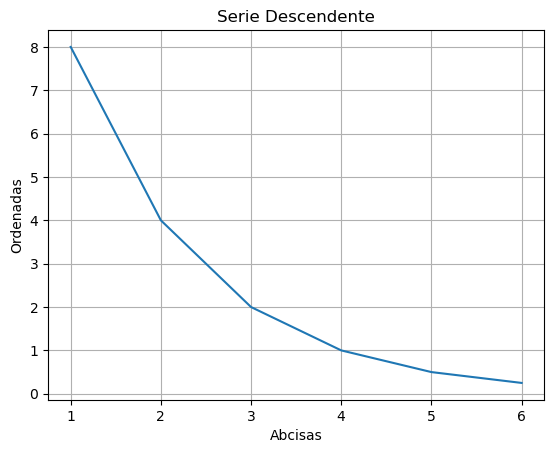

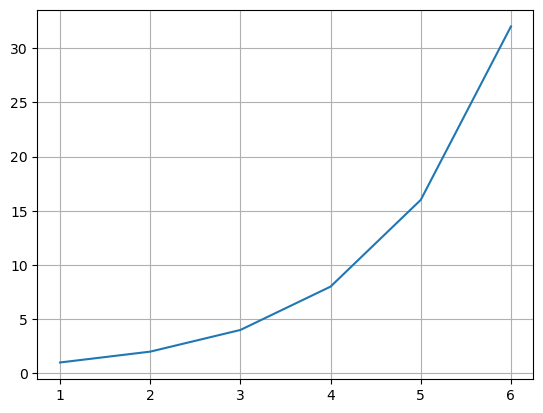

In [53]:
# Pruebas de funcionamiento:
representar_xxx_yyy([(1, 8), (2, 4), (3, 2), (4, 1), (5, 0.5), (6, 0.25)], "Abcisas","Ordenadas","Serie Descendente")
representar_xxx_yyy([(1, 1), (2, 2), (3, 4), (4, 8), (5, 16), (6, 32)])

<h3>Una gráfica concreta</h3>
Deseamos representar el número de películas de nuestra base de datos que se han
producido en un intervalo de años dado.

In [54]:
def repr_movies_years(data: dict[tuple,list], initial_year: int, end_year:int):
    years_and_movies = years_num_movies(data,initial_year,end_year)
    representar_xxx_yyy(list(years_and_movies.items()),'years', 'num. movies in a year', 'Number of movies in our database')

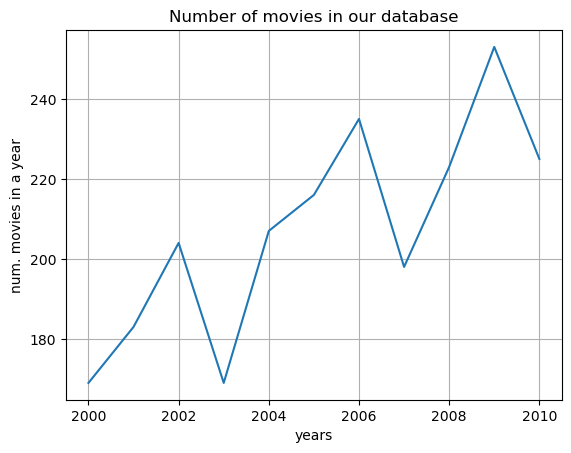

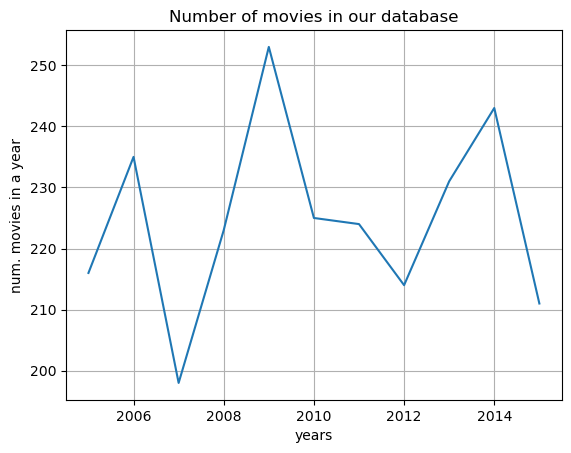

In [55]:
# Test de funcionamiento
repr_movies_years(main_dict_data, 2000, 2010)
repr_movies_years(main_dict_data, 2005, 2015)

<h2>D. Acceso a las urls de imdb y webscraping [2 puntos]</h2>
<h3> D.1. Recuperación de las URLs</h3>
<p> Con sencillas instrucciones, deseamos recuperar todas las urls de las películas de nuestro
 archivo, mostrando cuántas son, la primera de ellas o las diez primeras por ejemplo:
</p>

In [56]:
_, data = load_full_data(MOVIES_DATA)
urls = []
for d in data:
    if(d[17] != ''):
        urls.append(d[17].split('?ref_')[0])

first_url_movie = urls[0]
first_ten_urls = urls[:10]


In [57]:
# Test de funcionamiento
print(len(urls))
print()
print(first_url_movie)
print()
print(first_ten_urls)

5043

http://www.imdb.com/title/tt0499549/

['http://www.imdb.com/title/tt0499549/', 'http://www.imdb.com/title/tt0449088/', 'http://www.imdb.com/title/tt2379713/', 'http://www.imdb.com/title/tt1345836/', 'http://www.imdb.com/title/tt5289954/', 'http://www.imdb.com/title/tt0401729/', 'http://www.imdb.com/title/tt0413300/', 'http://www.imdb.com/title/tt0398286/', 'http://www.imdb.com/title/tt2395427/', 'http://www.imdb.com/title/tt0417741/']


In [58]:
# Una forma de evitar el error "Requests 403 forbidden" al hacer web scraping
HEADERS = {
 "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:98.0",
 "Accept": "text/html,application/xhtml+xml,application/xml;q=0.9",
 "Accept-Language": "en-US,en;q=0.5",
 "Accept-Encoding": "gzip, deflate",
 "Connection": "keep-alive",
 "Upgrade-Insecure-Requests": "1",
 "Sec-Fetch-Dest": "document",
 "Sec-Fetch-Mode": "navigate",
 "Sec-Fetch-Site": "none",
 "Sec-Fetch-User": "?1",
 "Cache-Control": "max-age=0",
    }

<h3> D.2. Carga de la estructura sintáctica de una URL</h3>
Ahora, deseamos extraer el código html de una película.

In [59]:
def soup_movie(film_url:str):
    page = requests.get(film_url, headers=HEADERS)
    return page.text

In [60]:
# Test de funcionamiento
soup = soup_movie(first_url_movie)
print(str(soup)[:1000])
print()
print("... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... .")
print()
print(str(soup)[-1000:])

<!DOCTYPE html><html lang="en-US" xmlns:og="http://opengraphprotocol.org/schema/" xmlns:fb="http://www.facebook.com/2008/fbml"><head><meta charSet="utf-8"/><meta name="viewport" content="width=device-width"/><script>if(typeof uet === 'function'){ uet('bb', 'LoadTitle', {wb: 1}); }</script><script>window.addEventListener('load', (event) => {
        if (typeof window.csa !== 'undefined' && typeof window.csa === 'function') {
            var csaLatencyPlugin = window.csa('Content', {
                element: {
                    slotId: 'LoadTitle',
                    type: 'service-call'
                }
            });
            csaLatencyPlugin('mark', 'clickToBodyBegin', 1731419189969);
        }
    })</script><title>Avatar (2009) - IMDb</title><meta name="description" content="Avatar: Directed by James Cameron. With Sam Worthington, Zoe Saldana, Sigourney Weaver, Stephen Lang. A paraplegic Marine dispatched to the moon Pandora on a unique mission becomes torn between following

<h3> D.3. Extracción de algunas piezas de información de una URL</h3>
Y ahora, con dicho código, deseamos extraer la siguiente información, referida a la película
 first_url_movie :
<li>La etiqueta completa del título de la película</li>
<li>La descripción (sólo el contenido).</li>
<li>La lista de los actores del reparto principal</li>
<li> La información sobre el presupuesto</li>

In [ ]:
# Esta celda debe ser completada por el estudiante

response = requests.get(first_url_movie, headers=HEADERS)
soup = BeautifulSoup(response.text, 'html.parser')

print(soup.title)

print()

spans = soup.find_all('span', {'role': 'presentation'})
print(spans[-1].get_text())

print()

response = requests.get(first_url_movie + 'fullcredits' , headers=HEADERS)
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find('table', {'class': 'cast_list'})
table_rows = table.find_all('tr')

def cast_by_film(film_url:str) -> list[str]:
    """By webscraping retrieve the entire cast of a movie from imdb

    Args:
        film_url (str): imdb movie link

    Returns:
        list[str]: the names of each cast member
    """
    response = requests.get(film_url + 'fullcredits' , headers=HEADERS)
    soup = BeautifulSoup(response.text, 'html.parser')
    table = soup.find('table', {'class': 'cast_list'})
    table_rows = table.find_all('tr')

    cast = []
    for row in table_rows:
        cells = row.find_all('td')
        cell_text = [cell.get_text(strip=True) for cell in cells]
        if len(cell_text) > 1:
            cast.append(cell_text[1])
    return cast

print(str(cast_by_film(first_url_movie)))

print()

response = requests.get(first_url_movie, headers=HEADERS)
soup = BeautifulSoup(response.text, 'html.parser')

spans = soup.find_all('span', {'class': 'ipc-metadata-list-item__list-content-item'})
for s in spans:
    if 'estimated' in s.get_text():
        budget = s.get_text()
print(budget)

<title>Avatar (2009) - IMDb</title>

A paraplegic Marine dispatched to the moon Pandora on a unique mission becomes torn between following his orders and protecting the world he feels is his home.

['Sam Worthington', 'Zoe Saldana', 'Sigourney Weaver', 'Stephen Lang', 'Michelle Rodriguez', 'Giovanni Ribisi', 'Joel David Moore', 'CCH Pounder', 'Wes Studi', 'Laz Alonso', 'Dileep Rao', 'Matt Gerald', 'Sean Anthony Moran', 'Jason Whyte', 'Scott Lawrence', 'Kelly Kilgour', 'James Patrick Pitt', 'Sean Patrick Murphy', 'Peter Dillon', 'Kevin Dorman', 'Kelson Henderson', 'David Van Horn', 'Jacob Tomuri', 'Michael Blain-Rozgay', 'Jon Curry', 'Julene Renee', 'Luke Hawker', 'Woody Schultz', 'Peter Mensah', 'Sonia Yee', 'Jahnel Curfman', 'Ilram Choi', 'Kyla Warren', 'Lisa Roumain', 'Debra Wilson', 'Taylor Kibby', 'Jodie Landau', 'Chris Mala', 'Julie Lamm', 'Cullen B. Madden', 'Joseph Brady Madden', 'Frankie Torres', 'Austin Wilson', 'Sara Wilson', 'Tamica Washington-Miller', 'Lucy Briant', 'Nathan

<h3> D.4. Actores que intervienen en una lista de URLs</h3>
 Necesitamos crear un archivo con los actores del reparto principal de las películas de IMDB,
 dada la lista de sus URLs.

In [ ]:
# Esta celda debe ser completada por el estudiante

def gather_actors(file_path:str, film_urls: list[str]):
   """Write in a file the cast members set of a list of imbd movies urls

   Args:
       file_path (str): file where the result will is written
       film_urls (list[str]): imdb film urls
   """
   films_casts = set()
   for url in film_urls:
      actors = cast_by_film(url)
      for actor in actors:
         films_casts.add(actor)
   os.remove(file_path)
   with open(file_path, "w") as file:
      for actor in films_casts:
         file.write(actor + "\n")


In [63]:
 # Test de funcionamiento
 # OJO: esta operación puede llevar bastante tiempo.
 # Para esta prueba, usamos un número limitado de películas.
gather_actors("actors_3_first_movies.txt", urls[:3])
! type actors_3_first_movies.txt

Lauren Maher
Francis Kora
Emma Robinson
David Schofield
Simbarashe Matshe
Derek Horsham
Fabio Colonna
Diane Morgan Carpenter
Peter Donald Badalamenti II
Samela A. Beasom
Antonio Salines
Mahmud Chowdhury
Keith Milner
Majed Ibrahim
Sergio Calderón
Ken Stratton
Judi Dench
Alison Draine
Alessio Di Silvestro
Ron Kerkmeester
Jim Raycroft
Jason Lamar
Wayne Phillips
Jay Bird
Andy Beckwith
Ryan de Quintal
Tim Hammersley
Paul Weston
Stefano Elfi DiClaudia
Gerard Smith
Sam Bunkall
Kyle Dyhrberg
Walid Mumuni
Johnny Depp
Tim Kano
Barry Shay
Vanessa Branch
Jorge Leon
Alister Albert
JB Blanc
Vuksan Rovcanin
Kaveh Khatiri
Pip Carter
Jessi Williams
James M.L. Muller
Wray Wilson
Christopher S. Capp
David Olawale Ayinde
Mark Casimir Dyniewicz Jr.
Edwin R. Habacon
Ellen Sutherland
Nigel Barber
Wai Wong
Aesop Aquarian
Joseph Balderrama
Jesse Houk
Sid Man
Adam McGrady
Naomie Harris
Nicholas Marshall
Bravita A. Threatt
Thomas Isao Morinaka
Nari Blair-Mangat
Logan Pithyou
Jon-Paul Motherway
Matthew Harker
Pez

In [64]:
# # La siguente llamada llevaría un tiempo realmente largo:
 
# import time # para cronometrar esta función, que tarda mucho
 
# reloj_inicio = time.time()
# gather_actors("actors_all_movies.txt", urls)
# reloj_fin = time.time()
 
# print("Tiempo invertido: %s segundos." % (reloj_fin - reloj_inicio))

<h2>E. Pandas [2 puntos]</h2>
A pertir de la tabla anterior, construimos otra con sólo algumos de los campos:

In [65]:
def load_dataframe(file_path:str)-> pd.DataFrame:
    return pd.read_csv(file_path)

In [66]:
# Test de funcionamiento
 
tabla_completa = load_dataframe(MOVIES_DATA)
 
tabla_completa

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,...,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
5039,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,...,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,...,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660


<h3> E.2. Tabla de los campos principales</h3>
A pertir de la tabla anterior, construimos otra con sólo algumos de los campos:

In [67]:
def fields_selected_dataframe(table : pd.DataFrame) -> pd.DataFrame:
    return table[['movie_title', 'color', 'director_name', 'language', 'country', 'actor_1_name', 'movie_imdb_link']]

In [68]:
# test de comprobación
 
tabla_breve = fields_selected_dataframe(tabla_completa)
 
tabla_breve

,movie_title,color,director_name,language,country,actor_1_name,movie_imdb_link
0,Avatar,Color,James Cameron,English,USA,CCH Pounder,http://www.imdb.com/title/tt0499549/?ref_=fn_t...
1,Pirates of the Caribbean: At World's End,Color,Gore Verbinski,English,USA,Johnny Depp,http://www.imdb.com/title/tt0449088/?ref_=fn_t...
2,Spectre,Color,Sam Mendes,English,UK,Christoph Waltz,http://www.imdb.com/title/tt2379713/?ref_=fn_t...
3,The Dark Knight Rises,Color,Christopher Nolan,English,USA,Tom Hardy,http://www.imdb.com/title/tt1345836/?ref_=fn_t...
4,Star Wars: Episode VII - The Force Awakens ...,NaN,Doug Walker,NaN,NaN,Doug Walker,http://www.imdb.com/title/tt5289954/?ref_=fn_t...
...,...,...,...,...,...,...,...
5038,Signed Sealed Delivered,Color,Scott Smith,English,Canada,Eric Mabius,http://www.imdb.com/title/tt3000844/?ref_=fn_t...
5039,The Following,Color,NaN,English,USA,Natalie Zea,http://www.imdb.com/title/tt2071645/?ref_=fn_t...
5040,A Plague So Pleasant,Color,Benjamin Roberds,English,USA,Eva Boehnke,http://www.imdb.com/title/tt2107644/?ref_=fn_t...
5041,Shanghai Calling,Color,Daniel Hsia,English,USA,Alan Ruck,http://www.imdb.com/title/tt2070597/?ref_=fn_t...


<h3>E.3. Columnas de una tabla</h3>
¿Cuáles son las columnas de nuestrsa tabla_breve?

In [69]:
tabla_breve.columns

Index(['movie_title', 'color', 'director_name', 'language', 'country',
       'actor_1_name', 'movie_imdb_link'],
      dtype='object')

<h3> E.4. Campos missing</h3>
Algunos campos muestran un valod NaN. Deseamos cambiarlo por una cadena de
caracteres: "Desc".

In [70]:
tabla_breve = tabla_breve.fillna('Desc')

In [71]:
tabla_breve

,movie_title,color,director_name,language,country,actor_1_name,movie_imdb_link
0,Avatar,Color,James Cameron,English,USA,CCH Pounder,http://www.imdb.com/title/tt0499549/?ref_=fn_t...
1,Pirates of the Caribbean: At World's End,Color,Gore Verbinski,English,USA,Johnny Depp,http://www.imdb.com/title/tt0449088/?ref_=fn_t...
2,Spectre,Color,Sam Mendes,English,UK,Christoph Waltz,http://www.imdb.com/title/tt2379713/?ref_=fn_t...
3,The Dark Knight Rises,Color,Christopher Nolan,English,USA,Tom Hardy,http://www.imdb.com/title/tt1345836/?ref_=fn_t...
4,Star Wars: Episode VII - The Force Awakens ...,Desc,Doug Walker,Desc,Desc,Doug Walker,http://www.imdb.com/title/tt5289954/?ref_=fn_t...
...,...,...,...,...,...,...,...
5038,Signed Sealed Delivered,Color,Scott Smith,English,Canada,Eric Mabius,http://www.imdb.com/title/tt3000844/?ref_=fn_t...
5039,The Following,Color,Desc,English,USA,Natalie Zea,http://www.imdb.com/title/tt2071645/?ref_=fn_t...
5040,A Plague So Pleasant,Color,Benjamin Roberds,English,USA,Eva Boehnke,http://www.imdb.com/title/tt2107644/?ref_=fn_t...
5041,Shanghai Calling,Color,Daniel Hsia,English,USA,Alan Ruck,http://www.imdb.com/title/tt2070597/?ref_=fn_t...


<h3> E.5. Director  películas y número de películas</h3>
Función que averigua la lista de títulos de películas de un director dado:

In [72]:
def titulos_de_director_df(table: pd.DataFrame, director:str)->pd.DataFrame:
    return table.loc[table['director_name']==director, ['movie_title']]


In [73]:
#Test de comprobación:
 
tabla_tits = titulos_de_director_df(tabla_breve, "James Cameron")
tabla_tits

,movie_title
0,Avatar
26,Titanic
288,Terminator 2: Judgment Day
291,True Lies
606,The Abyss
2486,Aliens
3575,The Terminator


In [74]:
list_tits = tabla_tits["movie_title"].to_list()
print(list_tits)

['Avatar\xa0', 'Titanic\xa0', 'Terminator 2: Judgment Day\xa0', 'True Lies\xa0', 'The Abyss\xa0', 'Aliens\xa0', 'The Terminator\xa0']


Deseamos saber qué directores han dirigido el máximo número de películas, junto con ese
número de películas

In [75]:
def directors_max_movies_df(table : pd.DataFrame)-> list[tuple[str,int]]:
    filtered_table= table[table['director_name'] != 'Desc']
    director_counts = filtered_table['director_name'].value_counts()
    max_count = director_counts.max()
    return list(director_counts[director_counts == max_count].items())

In [76]:
 # test de comprobación:
directors_max_movies_df(tabla_breve)

[('Steven Spielberg', 26)]

<h2>Parte F. Un cálculo masivo con map-reduce [0,5 puntos]<h2>

<p> En este apartado se ha de realizar un programa aparte, basado en la técnica de map
reduce, que calcule, para cada idioma, en qué países en que se han producido películas y la
 suma de los presupuestos de dichas películas. Cuando el idioma o el país o el presupuesto
 no se conozcan, no se considerará esta película. </p>

C:\...> python language_budget_countries.py -q algunos_campos.txt

<p> El programa funcionará necesariamente con la técnica map-reduce, que podemos poner en
 juego con la librería mrjob . </p>
<p> El funcionamiento del mismo se puede activar también desde aquí: </p>

In [77]:
# Hagamos una llamada al programa de consola desde aquí:
! python language_budget_countries.py -q algunos_campos.txt

"Aboriginal"	[["UK","Australia"],86000000.0]
"Arabic"	[["Turkey","Egypt","France","Germany","United Arab Emirates"],11224999.0]
"Aramaic"	[["USA"],30000000.0]
"Bosnian"	[["USA"],13000000.0]
"Cantonese"	[["Hong Kong","China","USA"],154499998.0]
"Chinese"	[["China"],11999998.0]
"Czech"	[["Czech Republic"],84450000.0]
"Danish"	[["Denmark"],50099998.0]
"Dari"	[["USA","Afghanistan"],20046000.0]
"Dutch"	[["Netherlands"],32150000.0]
"Dzongkha"	[["Australia"],1800000.0]
"English"	[["USA","UK","New Zealand","Canada","Australia","Belgium","Germany","China","New Line","France","Japan","Spain","Hong Kong","Czech Republic","South Korea","Peru","Italy","Aruba","Denmark","Libya","Ireland","South Africa","Switzerland","Romania","West Germany","Chile","Hungary","Russia","Mexico","India","Panama","-1","Greece","Netherlands","Norway","Official site","Cambodia","Slovakia","Bulgaria","Iran","Georgia","Thailand","Nigeria","Bahamas","Iceland","Brazil","Poland","Kyrgyzstan","Cameroon","Philippines"],142058374

In [78]:
 # Para que el resultado se almacene en un archivo:
! python language_budget_countries.py -q algunos_campos.txt > language_c

La siguiente celda me permite ver tu programa cómodamente desde aquí.

In [79]:
def print_file(filename):
    with open(filename, "r") as f:
        for line in f:
            print(line, end="")
print_file("./language_budget_countries.py")

from mrjob.job import MRJob

class LanguageBudgetCountries(MRJob):
    
    def to_float(self,number):
        try:
            return float(number)
        except:
            return 0
        
    
    def mapper(self, _, line):
        fields = line.split('|')
        language = fields[1]
        country = fields[3] 
        budget = self.to_float(fields[4]) 

        if language not in['','-1'] and country != ['','-1'] and budget != 0:
            yield language, (country, budget)
            
    def reducer(self, language, values):
        countries = []
        total_budget = 0
        for country, budget in values:
            if (country not in countries):
                countries.append(country)
            total_budget += budget
        yield language, (countries, total_budget)
        
if __name__ == '__main__':
    LanguageBudgetCountries.run()

<h2> Parte G. Un apartado libre [0.5 puntos]</h2>
    <h3 style="color: blue;">Que pelicula ver?</h3>
    <span style="color: blue;">
        <p>En este apartado elaboro una funcion que busca las peliculas favoritas en base a ciertos parametros relacionados con la busqueda. Estos parametros se pueden recolectar de manera discursiva con el usuario del sistema un hipotetico sistema con un frontend adecuado. La idea de esta funcion es llevar acabo la logica de dicho proceso de negocio.</p>
        <p>Se desea buscar aquellas peliculas que tengan un lenguaje y duracion acorde a cierto parametro. </p>       
        <p>Se desea recibir una lista de genereos y palabras claves deseadas para buscar peliculas que contengan al menos un elemento de dichas listas de valores. Los generos y palabras claves son opcionales y de estar presente y no hallarse coincidencias deberan ignorarse informando tal caso.
        Ademas las peliculas retornadas deberan tener un puntaje menor 6 y ser contemporante con el usuario que este consultando por las peliculas</p>
    </span>



In [ ]:
def list_intersection_generator(list1, list2):
    b_set = set(list2) 
    for element in list1:
        if element in b_set:
            yield True
    yield False

def films_to_watch(preferred_language:str, duration:int, watcher_age:int, genres:list[str], keywords:list[str]) -> pd.DataFrame:
    """Filter films from the movie dataset which are good to be watch starting from the parameters recived

    Args:
        preferred_language (str): film language desired
        duration (int): maximum duration desired
        watcher_age (int)
        genres (list[str]): optional - list of genres that are desired. If not match then ignored
        keywords (list[str]): optional - list of plot keyoword that are desired. If not match then ignoredcription_

    Returns:
        pd.DataFrame: movies title and year that match the criteria
    """
    data = pd.read_csv(MOVIES_DATA)

    if data['duration'].isnull().sum() > 0:
        data['duration'].fillna(0.0, inplace=True)

    films_preselected = data.loc[(data['language'] == preferred_language) &
                                (data['duration'] <= float(duration)) &
                                (data['duration'] > 0) &
                                (datetime.datetime.now().year - data['title_year'] <= watcher_age) &
                                (data['imdb_score'] > 6),
                                ['movie_title', 'title_year', 'genres', 'plot_keywords']]
    
    films_selected = films_preselected
    if(len(genres) > 0 or len(keywords) > 0):

        films_selected = pd.DataFrame()

        films_preselected = films_preselected.fillna({'genres': '', 'plot_keywords': ''})
        
        if(len(genres) > 0 and len(keywords) > 0):
            for _,film in films_preselected.iterrows():
                try:
                    generator_genres_to_match = list_intersection_generator(genres,''.join([ f.lower() for f in film['genres']]).split('|') )
                    generator_keywords_to_match = list_intersection_generator(keywords,''.join([f.lower() for f in film['plot_keywords']]).split('|'))
                    if any(generator_genres_to_match) and any(generator_keywords_to_match):
                        films_selected = films_selected._append(film, ignore_index=True)
                except Exception:
                    continue           
        elif len(genres) > 0:
             for _,film in films_preselected.iterrows():
                try:
                    generator_genres_to_match = list_intersection_generator(genres,''.join([ f.lower() for f in film['genres'] ]).split('|'))
                    if any(generator_genres_to_match):
                        films_selected = films_selected._append(film, ignore_index=True) 
                except Exception as e:
                    continue           
        elif len(keywords) > 0:
             for _,film in films_preselected.iterrows():
                try:
                    generator_keywords_to_match = list_intersection_generator(keywords,''.join([f.lower() for f in film['plot_keywords']]).split('|'))
                    if any(generator_keywords_to_match):
                        films_selected = films_selected._append(film, ignore_index=True)
                except Exception:
                    continue           
    if len(films_selected) > 0:
        return films_selected.drop(['genres', 'plot_keywords'],axis=1).reset_index(drop=True)
    else:
        return 'Films not found for those paremeters. Keywords and genres dimissed', films_preselected.drop(['genres', 'plot_keywords'],axis=1).reset_index(drop=True)
    

In [81]:
print(films_to_watch('English',120, 40,['adventure','action','sport','fantasy'],['alien','future','war','bomb']))

                              movie_title  title_year
0                         Men in Black 3       2012.0
1                   Terminator Salvation       2009.0
2                    Monsters vs. Aliens       2009.0
3                       Edge of Tomorrow       2014.0
4     Terminator 3: Rise of the Machines       2003.0
5                        Men in Black II       2002.0
6                      War of the Worlds       2005.0
7                           Ender's Game       2013.0
8                        Treasure Planet       2002.0
9                           Men in Black       1997.0
10                         Lilo & Stitch       2002.0
11                             Space Jam       1996.0
12                         Mars Attacks!       1996.0
13                            Surrogates       2009.0
14                            Titan A.E.       2000.0
15               Star Trek: Insurrection       1998.0
16                   Alien: Resurrection       1997.0
17                          

C:\Users\pablo\AppData\Local\Temp\ipykernel_11208\217325655.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['duration'].fillna(0.0, inplace=True)


In [82]:
print(films_to_watch('English',60, 27,['adventure','action','sport'],[]))

C:\Users\pablo\AppData\Local\Temp\ipykernel_11208\217325655.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['duration'].fillna(0.0, inplace=True)


                                    movie_title  title_year
0                    Michael Jordan to the Max       2000.0
1  Dolphins and Whales 3D: Tribes of the Ocean       2008.0


In [83]:
# Pruebas de funcionamiento:

print(films_to_watch('English',200, 27,[],['future']))

                            movie_title  title_year
0                               Avatar       2009.0
1                 Terminator Salvation       2009.0
2   Terminator 3: Rise of the Machines       2003.0
3                   Terminator Genisys       2015.0
4               The Matrix Revolutions       2003.0
5                            Star Trek       2009.0
6                         Ender's Game       2013.0
7                      Minority Report       2002.0
8                    Starship Troopers       1997.0
9                          Cloud Atlas       2012.0
10        A.I. Artificial Intelligence       2001.0
11                          Surrogates       2009.0
12                             Chappie       2015.0
13                            Pandorum       2009.0
14                            Impostor       2001.0
15                            Sunshine       2007.0
16                            Serenity       2005.0
17                             Gattaca       1997.0
18          

C:\Users\pablo\AppData\Local\Temp\ipykernel_11208\217325655.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['duration'].fillna(0.0, inplace=True)
